<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/Simple%20Chest%20XRay/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#data_path = "/content/drive/MyDrive/Harvard_Chest_XRay/"
data_path = "/content/drive/MyDrive/Simple_Chest_XRay/"
#data_path = "/content/drive/My Drive/NIH_Chest_XRay/"

sample_ratio = 1
batch_size = 96
num_epochs = 20

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio, batch_size)

**MODEL TRAINING**

In [ ]:
# Define the AlexNet model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.classifier[6] = nn.Linear(4096, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "AlexNet", num_epochs)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Epoch 1/20: 100%|██████████| 43/43 [01:18<00:00,  1.82s/batch, Accuracy=0.747, Loss=0.516, Precision=0.691, Recall=0.556, F1 Score=0.541]


VALIDATION: Accuracy: 0.7235 | Loss: 0.4596 | Recall: 0.8051 | Precision: 0.7339 | F-score: 0.7092



Epoch 2/20: 100%|██████████| 43/43 [01:17<00:00,  1.81s/batch, Accuracy=0.89, Loss=0.268, Precision=0.794, Recall=0.711, F1 Score=0.735]


VALIDATION: Accuracy: 0.9078 | Loss: 0.2494 | Recall: 0.9206 | Precision: 0.8682 | F-score: 0.8881



Epoch 3/20: 100%|██████████| 43/43 [01:16<00:00,  1.77s/batch, Accuracy=0.939, Loss=0.168, Precision=0.841, Recall=0.782, F1 Score=0.804]


VALIDATION: Accuracy: 0.8993 | Loss: 0.2141 | Recall: 0.9149 | Precision: 0.8584 | F-score: 0.8788



Epoch 4/20: 100%|██████████| 43/43 [01:17<00:00,  1.80s/batch, Accuracy=0.953, Loss=0.133, Precision=0.868, Recall=0.821, F1 Score=0.84]


VALIDATION: Accuracy: 0.9454 | Loss: 0.1309 | Recall: 0.9265 | Precision: 0.9302 | F-score: 0.9283



Epoch 5/20: 100%|██████████| 43/43 [01:17<00:00,  1.81s/batch, Accuracy=0.955, Loss=0.119, Precision=0.884, Recall=0.845, F1 Score=0.862]


VALIDATION: Accuracy: 0.9471 | Loss: 0.1354 | Recall: 0.9233 | Precision: 0.9368 | F-score: 0.9298



Epoch 6/20: 100%|██████████| 43/43 [01:18<00:00,  1.81s/batch, Accuracy=0.956, Loss=0.118, Precision=0.895, Recall=0.861, F1 Score=0.876]


VALIDATION: Accuracy: 0.9300 | Loss: 0.1668 | Recall: 0.9313 | Precision: 0.8978 | F-score: 0.9124



Epoch 7/20: 100%|██████████| 43/43 [01:18<00:00,  1.82s/batch, Accuracy=0.964, Loss=0.103, Precision=0.904, Recall=0.875, F1 Score=0.888]


VALIDATION: Accuracy: 0.9488 | Loss: 0.1406 | Recall: 0.9158 | Precision: 0.9486 | F-score: 0.9306



Epoch 8/20: 100%|██████████| 43/43 [01:17<00:00,  1.80s/batch, Accuracy=0.97, Loss=0.082, Precision=0.912, Recall=0.885, F1 Score=0.897]


VALIDATION: Accuracy: 0.9471 | Loss: 0.1481 | Recall: 0.9082 | Precision: 0.9523 | F-score: 0.9274



Epoch 9/20: 100%|██████████| 43/43 [01:17<00:00,  1.80s/batch, Accuracy=0.968, Loss=0.088, Precision=0.917, Recall=0.893, F1 Score=0.904]


VALIDATION: Accuracy: 0.9573 | Loss: 0.1164 | Recall: 0.9367 | Precision: 0.9507 | F-score: 0.9434



Epoch 10/20: 100%|██████████| 43/43 [01:20<00:00,  1.88s/batch, Accuracy=0.975, Loss=0.0727, Precision=0.923, Recall=0.901, F1 Score=0.911]


VALIDATION: Accuracy: 0.9556 | Loss: 0.1248 | Recall: 0.9485 | Precision: 0.9374 | F-score: 0.9427



Epoch 11/20: 100%|██████████| 43/43 [01:21<00:00,  1.90s/batch, Accuracy=0.978, Loss=0.0641, Precision=0.927, Recall=0.907, F1 Score=0.916]


VALIDATION: Accuracy: 0.9573 | Loss: 0.1406 | Recall: 0.9475 | Precision: 0.9418 | F-score: 0.9446



Epoch 12/20: 100%|██████████| 43/43 [01:22<00:00,  1.92s/batch, Accuracy=0.979, Loss=0.0635, Precision=0.931, Recall=0.912, F1 Score=0.921]


VALIDATION: Accuracy: 0.9625 | Loss: 0.1192 | Recall: 0.9444 | Precision: 0.9565 | F-score: 0.9503



Epoch 13/20: 100%|██████████| 43/43 [01:21<00:00,  1.90s/batch, Accuracy=0.98, Loss=0.0571, Precision=0.935, Recall=0.917, F1 Score=0.926]


VALIDATION: Accuracy: 0.9642 | Loss: 0.1371 | Recall: 0.9542 | Precision: 0.9523 | F-score: 0.9533



Epoch 14/20: 100%|██████████| 43/43 [01:22<00:00,  1.91s/batch, Accuracy=0.978, Loss=0.0633, Precision=0.938, Recall=0.921, F1 Score=0.929]


VALIDATION: Accuracy: 0.9539 | Loss: 0.1373 | Recall: 0.9387 | Precision: 0.9406 | F-score: 0.9397



Epoch 15/20: 100%|██████████| 43/43 [01:21<00:00,  1.89s/batch, Accuracy=0.979, Loss=0.0551, Precision=0.94, Recall=0.924, F1 Score=0.932]


VALIDATION: Accuracy: 0.9608 | Loss: 0.1251 | Recall: 0.9411 | Precision: 0.9553 | F-score: 0.9479



Epoch 16/20: 100%|██████████| 43/43 [01:23<00:00,  1.95s/batch, Accuracy=0.982, Loss=0.0507, Precision=0.943, Recall=0.928, F1 Score=0.935]


VALIDATION: Accuracy: 0.9642 | Loss: 0.1195 | Recall: 0.9586 | Precision: 0.9490 | F-score: 0.9537



Epoch 17/20: 100%|██████████| 43/43 [01:24<00:00,  1.96s/batch, Accuracy=0.987, Loss=0.0414, Precision=0.945, Recall=0.931, F1 Score=0.938]


VALIDATION: Accuracy: 0.9556 | Loss: 0.1196 | Recall: 0.9463 | Precision: 0.9389 | F-score: 0.9425



Epoch 18/20: 100%|██████████| 43/43 [01:23<00:00,  1.94s/batch, Accuracy=0.983, Loss=0.045, Precision=0.947, Recall=0.933, F1 Score=0.94]


VALIDATION: Accuracy: 0.9573 | Loss: 0.1377 | Recall: 0.9453 | Precision: 0.9434 | F-score: 0.9444



Epoch 19/20: 100%|██████████| 43/43 [01:26<00:00,  2.02s/batch, Accuracy=0.987, Loss=0.0399, Precision=0.949, Recall=0.936, F1 Score=0.942]


VALIDATION: Accuracy: 0.9608 | Loss: 0.1295 | Recall: 0.9433 | Precision: 0.9533 | F-score: 0.9481



Epoch 20/20: 100%|██████████| 43/43 [01:27<00:00,  2.03s/batch, Accuracy=0.99, Loss=0.0275, Precision=0.951, Recall=0.938, F1 Score=0.945]


VALIDATION: Accuracy: 0.9539 | Loss: 0.1660 | Recall: 0.9279 | Precision: 0.9501 | F-score: 0.9383

[0.5159285917067475, 0.2684829307928641, 0.16767757047339457, 0.13279594435913442, 0.11930053611882403, 0.11838449584649638, 0.10293484624238036, 0.0819946994846421, 0.08798764042409056, 0.07272353756715683, 0.06411085136563756, 0.06347510644679362, 0.057063393551782665, 0.06331001406989466, 0.05511049872501016, 0.0506649166836364, 0.041422166351059005, 0.04499161444289942, 0.039856507628974344, 0.02746649003953694] [0.4595787106113629, 0.24943454182188665, 0.21410382984034437, 0.1308739779536126, 0.13537695738184982, 0.16680078096560652, 0.140587185366467, 0.14808478183033574, 0.11636458464132132, 0.12479958477280653, 0.14063523387784335, 0.11919944873874301, 0.13710396014052242, 0.13731500900544405, 0.12508535659760744, 0.11946198740916854, 0.119624014727695, 0.13774065456572449, 0.129508503111963, 0.16604220546418866]


In [ ]:
torch.save(model.state_dict(), "{}alexnet.pth".format(data_path))

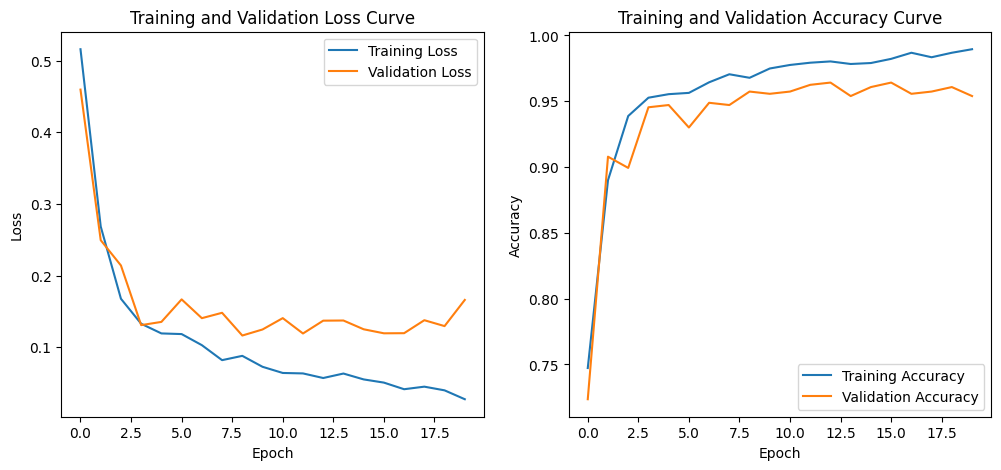

In [ ]:
#Plotting the Loss and Accuracy Curves
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

TEST: Accuracy: 0.9573 | Loss: 0.1235 | Recall: 0.9338 | Precision: 0.9604 | F-score: 0.9459



<Figure size 800x800 with 0 Axes>

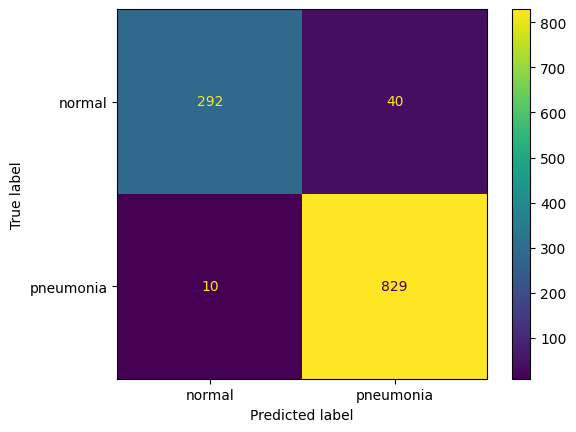

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "AlexNet")

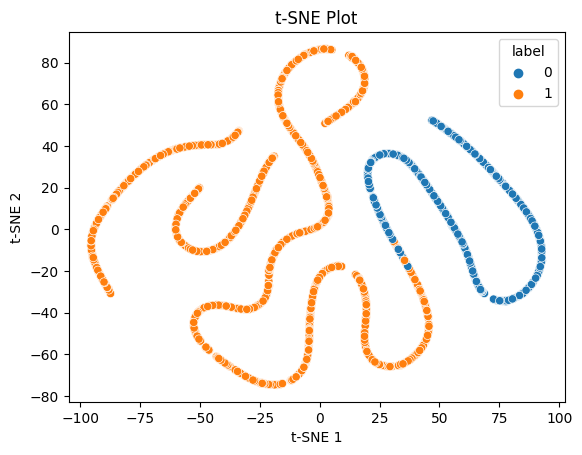

In [ ]:
#Obtain the TSNE Plot
plot_TSNE(train_loader, device, model)

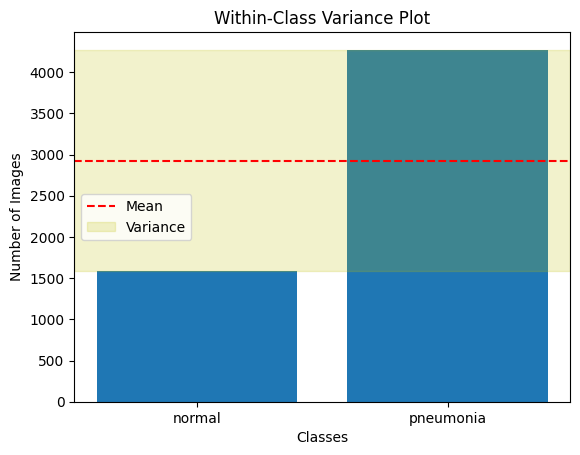

In [ ]:
#Plot the Within-Class Variance of the dataset
plot_within_class_variance(dataset)